d:\softwares\work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JHW\AppData\Local\Temp\ipykernel_9948\1738535630.py:21: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids1[0], centroids1[1], s=70, marker="x", edgecolors="white")
C:\Users\JHW\AppData\Local\Temp\ipykernel_9948\1738535630.py:22: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids2[0], centroids2[1], s=70, marker="x", edgecolors="white")


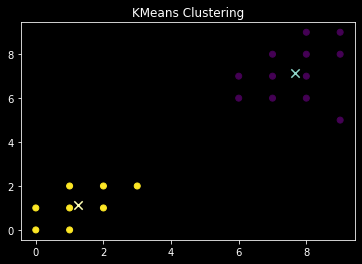

In [3]:
# first question

import pandas as pd

data = pd.DataFrame({
    "fea1": [0, 1, 0, 1, 2, 1, 2, 3, 6, 7, 8, 6, 7, 8, 9, 7, 8, 9, 8, 9],
    "fea2": [0, 0, 1, 1, 1, 2, 2, 2, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 5]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data.to_numpy())
preds = kmeans.predict(data.to_numpy())
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(data.to_numpy()[:, 0], data.to_numpy()[:, 1], c=preds)
ax.set_title("KMeans Clustering")
centroids1 = kmeans.cluster_centers_[0, :]
centroids2 = kmeans.cluster_centers_[1, :]
ax.scatter(centroids1[0], centroids1[1], s=70, marker="x", edgecolors="white")
ax.scatter(centroids2[0], centroids2[1], s=70, marker="x", edgecolors="white")
plt.show()

In [4]:
data = pd.DataFrame({
        "盈利情况": ["亏", "亏", "亏", "亏", "盈", "盈", "盈", "亏", "盈", "盈", "盈", "亏", "盈", "亏"],
        "企业类别": ["国有", "国有", "外资", "个体", "个体", "个体", "外资", "国有", "国有", "个体", "国有", "外资", "外资", "个体"],
        "企业规模": ["大", "大", "大", "中", "小", "小", "小", "中", "小", "中", "中", "中", "大", "中"],
        "经营行业": ["制造业", "商业", "制造业", "制造业", "制造业", "商业", "商业", "制造业", "制造业", "制造业", "商业", "商业", "制造业", "商业"],
        "类：违约记录": ["H", "H", "L", "L", "L", "H", "L", "H", "L", "L", "L", "L", "L", "H"]
    }
)
label = data.pop("类：违约记录")

from sklearn import tree
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in range(data.shape[-1]):
    data.iloc[:, i] = label_encoder.fit_transform(data.iloc[:, i])

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, label)
clf.score(data, label)

1.0

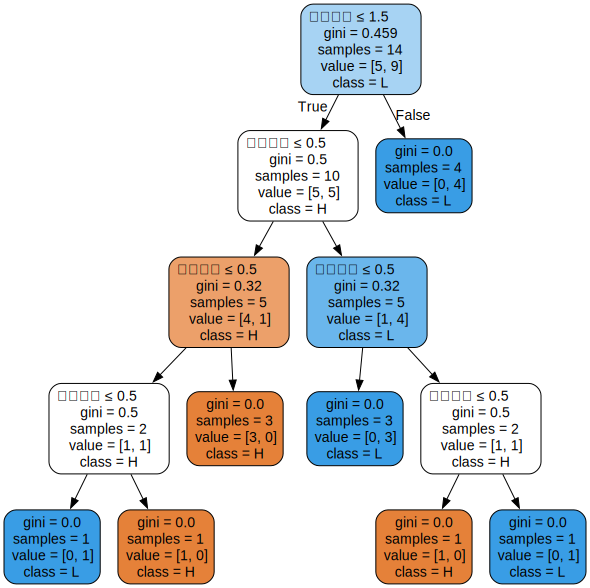

In [6]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=data.columns,  
                     class_names=["H", "L"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 